# 離散選択モデル

ここまでの推定モデルでは連続変数が被説明変数になっていました。
しかし、データの種類でみたように、離散変数や質的変数を被説明変数としたい場合もあると思います。
例えば次のような例です。

* 候補者を採用するかどうか
* 労働市場に参入するかどうか
* 顧客は商品を購入するか

これらは、意思決定や選択、保有するかしないか、適用するかしないか、当てはまるか当てはまらないかのの2つの値しか取りません。
0か1しかとらないと表現することができます。

$$y=\begin{cases}0, & \text{if} & \text{no}\\
                    1, & \text{if} & \text{yes} \\
                    \end{cases}$$

被説明変数$y$が2値の場合推定したいのは$y=1$となる確率です。

$$p=pr[y=1|x]=F(x'\beta)$$

$F(x'\beta)$は線形回帰、ロジット、プロビットのいずれかの関数の形をとります。
ただし、2値しかとらない被説明変数の推定式を線型確率モデルで最小二乗法で推定すると、予測値が0より小さいあるいは1より大きな推定値を取ることがあり確率として解釈できないなどの問題があります。

この問題に対処するためには線型モデルではなくて、非線形モデルであるプロビットモデル（Probit Model）とロジットモデル(probit Model)がよく用いられます。これは分布関数をもとに被説明変数と説明変数の非線形な関係を捉え、予測値が0から1の間の値をとり、よって被説明変数が１となる確率を予測することできるようになります。

プロビットモデルは正規分布関数を用いていて、ロジットモデルはロジスティック分布関数を用いていますが、いずれの関数の形状も似ているため推定結果も近似することが多いです。

プロビットモデルやロジットモデルの推定には最尤法（Maximum Likelihood: ML）が用いられます。
最小二乗法では誤差の二乗和を最小化していましたが、最尤法は尤度（likelihood）を最大化します。
尤度関数Lは、

$$L=Pr(Y_1)\times Pr(Y_2) \times Pr(Y_3) \times ...$$

ただし、

$$Pr(Y_i) = \begin{cases} Pr(Y_i=1)=F(a+bX_i) & , & \text{if} & Y_i =1 \\
            Pr(Y_i=0)=1-Pr(Y_i=1)=1-F(a+bX_i) & , & \text{if} & Y_i =0 \end{cases}$$

推定した係数の解釈は注意が必要です。

* xの増加は、y=1の可能性を増加／減少させる（その結果の可能性を高くする／低くする）。言い換えれば、x の増加は 1 の結果をより可能性の高いものにしたり、低いものにしたりする。
* ただし係数の符号は解釈できますが、大きさは解釈できません。モデルによって係数の尺度が異なるため、係数を用いて大きさを解釈することはできません。

このため、プロビット・ロジットモデルによる推定に当たっては<b>限界効果（marginal effects）</b>も確認することがほとんどです。

限界効用は説明変数$X$を１単位変化させた時の$y=1$の確率の変化を表します。
プロビット・ロジットモデルの限界効果は、
<!-- $\frac{\delta p}{\delta x_j}=F'(x'\beta)\beta_j$ -->
ロジットモデルの限界効果は、
$\frac{\delta p}{\delta x_j}= \Lambda(x'\beta)[1-\Lambda(x'\beta)]\beta=\frac{e^{x'\beta}}{(1+e^{x'\beta})^2}\beta_j$
プロビットモデルの限界効果は、$\frac{\delta p}{\delta x_j} = \phi(x'\beta)\beta_j$
となります。
限界効果は$x$に依存するので、特定の$x$の値（一般的には平均値）での限界効果を推定します。
係数と限界効果は同じ符号となります。


## 限界効果の推定
* 平均値における限界効果(Marginal effects at the mean)

    * 標本内の平均的な観測値（e.g., 平均的な人）の限界効果$\frac{\delta p}{\delta x_j}=F'(\bar{x}'\beta)\beta_j$を求めます。

* 限界効果の平均値(Average marginal effects)
    * 個々の限界効果の平均：　$\frac{\delta p}{\delta x_j}=\frac{\sum{F'(x'\beta)}}{n}\beta_j$
    * こちらの方が上の限界効果よりは良い
    
限界効果の解釈：
* $x$が増加すると、$y=1$ となる確率が増加（減少）することを、パーセントで表した限界効果です。
* ダミー変数の場合、限界効果は基準(ベース)（$x=0$）との比較で表します
* 連続変数の場合、限界効果は$x$の1単位の変化で表します。 
* 限界効果の符号と大きさの両方を解釈します。
* プロビットモデルとロジットモデルでは、ほとんど同じ限界効果が得られます。

## ロジットモデルにおけるオッズ比（Odds ratio）
* オッズ比（odds ratio/relative risk）は、$p/(1-p)$で$y=0$となる確率に対する$y=1$となる確率を測定します

$$p=\frac{exp(x'\beta)}{1+exp(x'\beta)}$$
$$\frac{p}{1-p}=exp(x'\beta)$$
$$ln\frac{p}{1-p}=x'\beta$$
* オッズ比が2であれば$y=1$である確率は$y=0$である確率の2倍と解釈できます。

In [156]:
from scipy.stats import logistic, norm, chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

## Logitモデル

Logit modelはシグモイド関数

$$P_i=\frac{1}{1+e^{-(\beta_1+\beta_2 X_i)}}$$

を仮定します。どんな形の関数か見てみましょう。

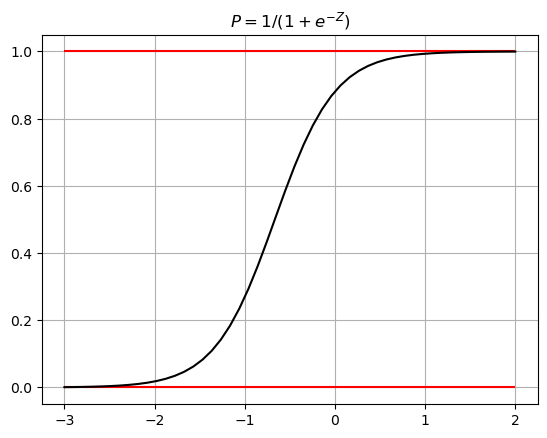

In [18]:
beta1, beta2 = 2, 3
X = np.linspace(-3, 2)
P = 1 / (1 + np.exp(-beta1-beta2*X))
plt.hlines(xmin=-3, xmax=2, y = 0, color = 'red')
plt.hlines(xmin=-3, xmax=2, y = 1, color = 'red')
plt.plot(X, P, color='k')
plt.title(r'$P = 1 / (1 + e^{-Z})$')
plt.grid()
plt.show()

上の図で確認できるように$P_i$の値は0から1となり確率を扱いたい場合に便利です。

以下、例として、ポルトガルの銀行が行った電話によるダイレクトマーケティングに関して、顧客がマーケティングの結果定期預金に申し込むかどうかを被説明変数とします。

***データを次のリンクからダウンロードして、ZIPを解凍した後、`bank.csv`をこのJupyterNotebookと同じフォルダに移動させてください。***
[https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip)から


In [140]:
bank = pd.read_csv('./bank.csv', index_col=None, sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [141]:
# `y`列のデータを`yes`であれば1、その他は0を持つダミー変数に変換します。
y_dict = {'no':0, 'yes':1}
bank.y = bank.y.map(y_dict)

In [142]:
# 数値データの変数間の相関を確認
bank.corr(numeric_only=True)

/var/folders/x2/7ss5kcb12n1gtlpc8p2mtjtw0000gn/T/ipykernel_79405/1523853054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.corr()


,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


各行に顧客ごとの属性などのデータが格納されていて、
列`y`に顧客が定期預金に申し込んだかどうか（被説明変数）があります。

その他の列のデータの詳細は[こちら](https://archive.ics.uci.edu/ml/datasets/bank+marketing#)をみてください。

定期預金に申し込んだかどうかが、キャンペーン中の顧客へのコンタクト回数`campaign`や、キャンペーン前の顧客へのコンタクト数`previous`、顧客との最終コンタクトからの経過日`pdays`などでどれだけ説明できるかをみてみます。

In [148]:
bank.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

`statsmodels`では`C()`でダミー変数を自動生成するので、`var`を`C(var)`とします。

In [150]:
formula = 'y ~ 1 + age + duration + campaign + pdays + C(job)'
logit_mod = sm.GLM.from_formula(formula, data = bank, family=sm.families.Binomial())
logit_res = logit_mod.fit()
print(logit_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4505
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.6
Date:                Wed, 05 Apr 2023   Deviance:                       2557.2
Time:                        14:15:35   Pearson chi2:                 5.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1385
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

結果を確認すると`C(job)`のうち、`admin.`が自動的にベースとして、式から外れていることがわかります。

### 平均限界効果（Average Partial Effects）
`statsmodels`では`get_margeff()`を使うことで平均限界効果求めることができます

引数として`at='overall'`(default)を指定すると平均限界効果が、`at='mean'`を指定すると平均での限界効果を算出できます。
デフォルトが`at='overall'`なので何も指定しないと平均限界効果になります。

In [158]:
formula = 'y ~ 1 + age + duration + campaign + pdays + C(job)'
logit_mod = smf.logit(formula, data= bank)
logit_res = logit_mod.fit()
print(logit_res.get_margeff(at='overall').summary())

Optimization terminated successfully.
         Current function value: 0.282812
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(job)[T.blue-collar]      -0.0708      0.017     -4.159      0.000      -0.104      -0.037
C(job)[T.entrepreneur]     -0.0497      0.028     -1.792      0.073      -0.104       0.005
C(job)[T.housemaid]        -0.0189      0.029     -0.647      0.518      -0.076       0.038
C(job)[T.management]        0.0058      0.015      0.382      0.702      -0.024       0.035
C(job)[T.retired]           0.0535      0.021      2.491      0.013       0.011       0.096
C(job)[T.self-employed]    -0.0185      0.025     -0.736      0.462      -0.068       0.031
C(job)[T.s

### オッズ比（Odds Ratio）

続いてオッズ比も求めましょう。

In [159]:

params = logit_res.params
conf = logit_res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
conf = np.exp(conf)
# interceptを除外します
conf = conf.drop('Intercept')
print(conf)

                               5%       95%  Odds Ratio
Intercept                0.020886  0.065453    0.036973
C(job)[T.blue-collar]    0.274134  0.627926    0.414892
C(job)[T.entrepreneur]   0.274153  1.059587    0.538970
C(job)[T.housemaid]      0.388218  1.610664    0.790752
C(job)[T.management]     0.743142  1.553980    1.074629
C(job)[T.retired]        1.152212  3.282224    1.944690
C(job)[T.self-employed]  0.430151  1.466488    0.794236
C(job)[T.services]       0.382347  1.003625    0.619462
C(job)[T.student]        1.326953  4.864616    2.540692
C(job)[T.technician]     0.571728  1.263080    0.849787
C(job)[T.unemployed]     0.283287  1.215402    0.586777
C(job)[T.unknown]        0.714213  4.989650    1.887769
age                      0.993554  1.016117    1.004772
duration                 1.003421  1.004133    1.003777
campaign                 0.870762  0.964264    0.916321
pdays                    1.002018  1.003715    1.002866


わかりやすさのためオッズ比を可視化します。

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.hlines(y=conf.index, xmin=conf['2.5%'], xmax=conf['97.5%'], color = 'grey')
ax.scatter(x=conf['Odds Ratio'], y=conf.index, marker='o', edgecolors='b', color='None', s=5)
# 1以上か以下をわかりやすくするため1のラインを引きます
ax.vlines(x=1, ymin=0, ymax=len(conf), color='r', linestyles='--')
ax.set_xlabel('Odds Ratio')
plt.show()

## プロビットモデル（Probit model）

プロビットモデルはロジットモデルとよく似ています。Pythonではロジットモデルと同様に`statsmodels`などで求めることができます。


In [ ]:
formula = 'y ~ age + duration + campaign + pdays + C(job)'
probit_mod = sm.Probit.from_formula(formula=formula, data=bank)
probit_res = probit_mod.fit()
print(probit_res.summary())

得られた結果をロジットモデルと比べてみましょう。

限界効果を推定します。

In [ ]:
probit_margeff = probit_res.get_margeff('overall')
print(probit_margeff.summary())